# Linear fits

**Motivation:** I wanted to reproduce the plots and experiments from Andrew Ng's CS 229 notes (specifically, in Section 8.1) for my Mastering Model Building talk at the Train the Trainer workshop.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [2]:
def f(x):
    a,b = 0.4, 0.25
    return 4*np.power(x-a,2)+b

In [3]:
xx = np.linspace(0,1)
yy = f(xx)

In [4]:
N_tr = 6

eps = np.random.randn(N_tr)
std=.125

X_tr = np.linspace(0,1,N_tr+2)[1:-1]
y_tr = f(X_tr) + std * eps

In [20]:
eps2 = np.random.randn(N_tr)

y_te = f(X_tr) + std * eps2

In [6]:
N_long = 150

eps3 = np.random.randn(N_long)

X_long = np.linspace(0,1,N_long+2)[1:-1]
y_long = f(X_long) + std * eps3

In [7]:
def poly1(x, c0,c1):
    '''
    Fit a linear function
    '''
    return c0 + c1 * x


def poly2(x, c0, c1, c2):
    '''
    Fit a quadratic function
    '''
    return c0 + c1 * x + c2 * np.power(x,2)


def poly5(x, c0, c1, c2, c3, c4):
    '''
    Fit a 5th order function
    '''
    y = 0
    for i, ci in enumerate([c0, c1, c2, c3, c4]):
        y += ci * np.power(x,i)
    return y
        

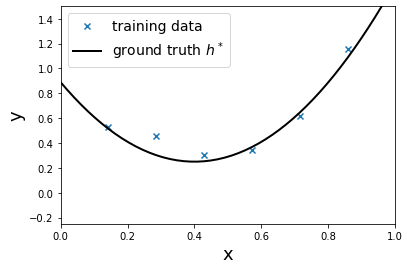

In [8]:
plt.scatter(X_tr,y_tr,marker='x',label='training data')

plt.plot(xx,yy,'k',lw=2,label='ground truth $h^*$')
plt.xlim(xx[[0,-1]])
plt.ylim(-.25,1.5)

plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)


handles, labels = plt.gca().get_legend_handles_labels()

plt.legend(handles[::-1],labels[::-1],fontsize=14)
plt.savefig('figures/fig01a.pdf')

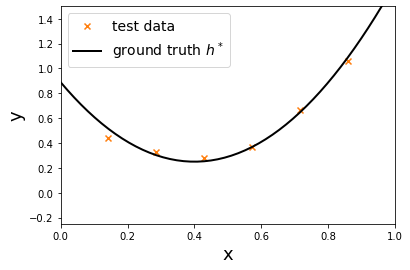

In [21]:
plt.scatter(X_tr,y_te,marker='x',color='C1',label='test data')

plt.plot(xx,yy,'k',lw=2,label='ground truth $h^*$')
plt.xlim(xx[[0,-1]])
plt.ylim(-.25,1.5)

plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)


handles, labels = plt.gca().get_legend_handles_labels()

plt.legend(handles[::-1],labels[::-1],fontsize=14)
plt.savefig('figures/fig01b.pdf')

**Underfitting:** Try to fit a linear model

In [10]:
th_lin, _ = curve_fit(poly1,X_tr,y_tr)

In [11]:
th_lin

array([0.20231767, 0.73016621])

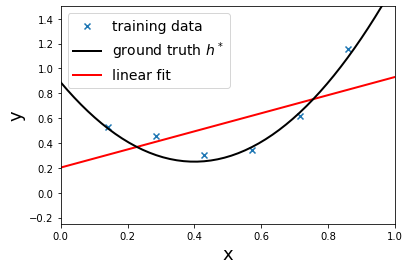

In [22]:
plt.scatter(X_tr,y_tr,marker='x',label='training data')

plt.plot(xx,poly1(xx,*th_lin),'r',lw=2,label='linear fit')
plt.plot(xx,yy,'k',lw=2,label='ground truth $h^*$')

plt.xlim(xx[[0,-1]])
plt.ylim(-.25,1.5)

plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)


handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1],labels[::-1],fontsize=14)
plt.savefig('figures/fig02a.pdf')

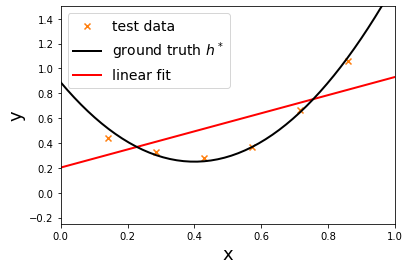

In [23]:
plt.scatter(X_tr,y_te,marker='x',color='C1',label='test data')

plt.plot(xx,poly1(xx,*th_lin),'r',lw=2,label='linear fit')
plt.plot(xx,yy,'k',lw=2,label='ground truth $h^*$')

plt.xlim(xx[[0,-1]])
plt.ylim(-.25,1.5)

plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)


handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1],labels[::-1],fontsize=14)
plt.savefig('figures/fig02b.pdf')

Now with _lots_ of examples.

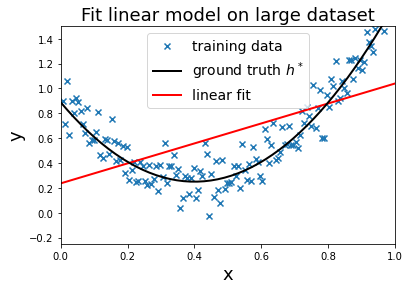

In [30]:
plt.scatter(X_long,y_long,marker='x',label='training data')

plt.plot(xx,poly1(xx,*curve_fit(poly1,X_long,y_long)[0]),'r',lw=2,label='linear fit')
plt.plot(xx,yy,'k',lw=2,label='ground truth $h^*$')

plt.xlim(xx[[0,-1]])
plt.ylim(-.25,1.5)

plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.title('Fit linear model on large dataset',fontsize=18)

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1],labels[::-1],fontsize=14)
plt.savefig('figures/fig03.pdf')
plt.show()

Now with no noise.

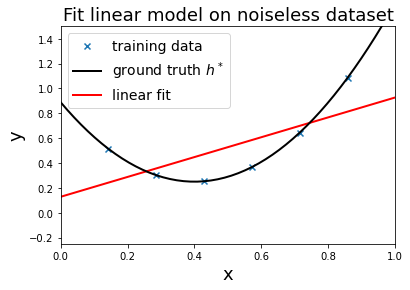

In [33]:
plt.scatter(X_tr,f(X_tr),marker='x',label='training data')

plt.plot(xx,poly1(xx,*curve_fit(poly1,X_tr,f(X_tr))[0]),'r',lw=2,label='linear fit')
plt.plot(xx,yy,'k',lw=2,label='ground truth $h^*$')

plt.xlim(xx[[0,-1]])
plt.ylim(-.25,1.5)

plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.title('Fit linear model on noiseless dataset',fontsize=18)

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1],labels[::-1],fontsize=14)
plt.savefig('figures/fig04.pdf')
plt.show()

**Overfitting:** Now fit the $5^{th}$ order polynomial

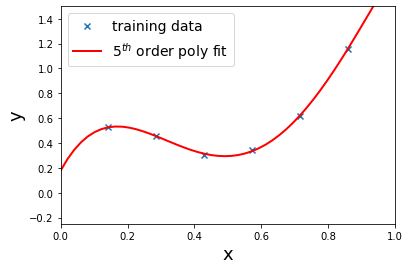

In [65]:
plt.scatter(X_tr,y_tr,marker='x',label='training data')

plt.plot(xx,poly5(xx,*curve_fit(poly5,X_tr,y_tr)[0]),
         'r',lw=2,label='$5^{th}$ order poly fit')
# plt.plot(xx,yy,'k',lw=2,label='ground truth $h^*$')

plt.xlim(xx[[0,-1]])
plt.ylim(-.25,1.5)

plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)


handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1],labels[::-1],fontsize=14)#,frameon=False)
plt.savefig('figures/fig05a.pdf')

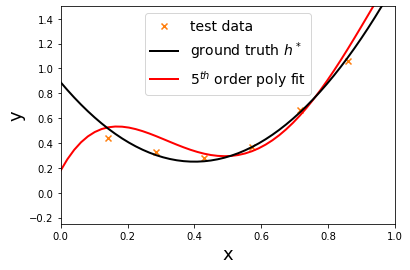

In [35]:
plt.scatter(X_tr,y_te,marker='x',color='C1',label='test data')

plt.plot(xx,poly5(xx,*curve_fit(poly5,X_tr,y_tr)[0]),
         'r',lw=2,label='$5^{th}$ order poly fit')
plt.plot(xx,yy,'k',lw=2,label='ground truth $h^*$')

plt.xlim(xx[[0,-1]])
plt.ylim(-.25,1.5)

plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)


handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1],labels[::-1],fontsize=14)
plt.savefig('figures/fig05b.pdf')

Fit the $5^{th}$ degree polynomial with the big dataset!!

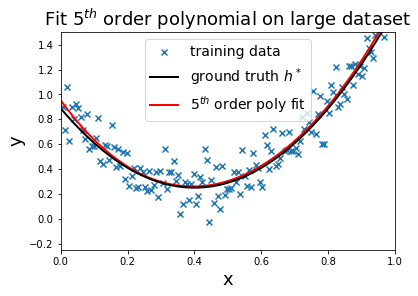

In [67]:
plt.scatter(X_long,y_long,marker='x',label='training data')

plt.plot(xx,poly5(xx,*curve_fit(poly5,X_long,y_long)[0]),'r',lw=2,
         label='$5^{th}$ order poly fit')
plt.plot(xx,yy,'k',lw=2,label='ground truth $h^*$')

plt.xlim(xx[[0,-1]])
plt.ylim(-.25,1.5)

plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.title('Fit $5^{th}$ order polynomial on large dataset',fontsize=18)

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1],labels[::-1],fontsize=14)
plt.savefig('figures/fig06.pdf')
plt.show()

**Next:** Fit the $5^{th}$ degree polynomial on _three_ different datasets!

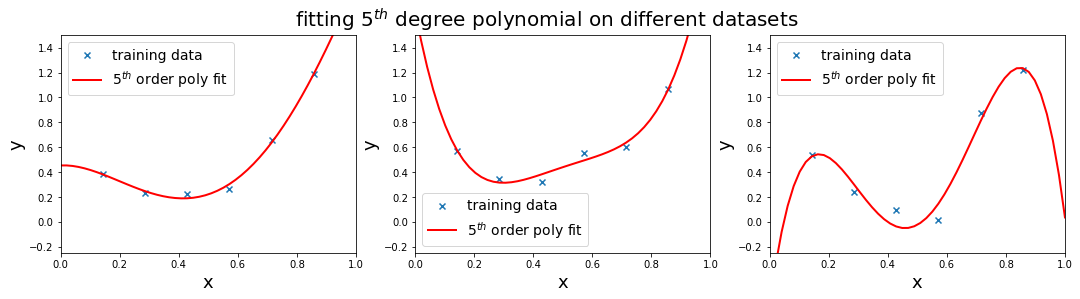

In [62]:
fig, axes = plt.subplots(1,3,figsize=(18,4))

for i,ax in enumerate(axes):
    xi = X_tr
    yi = f(xi) + std * np.random.randn(N_tr)
    
    ax.scatter(xi,yi,marker='x',label='training data')
    
    ax.plot(xx,poly5(xx,*curve_fit(poly5,xi,yi)[0]),
         'r',lw=2,label='$5^{th}$ order poly fit')
    # plt.plot(xx,yy,'k',lw=2,label='ground truth $h^*$')

    ax.set_xlim(xx[[0,-1]])
    ax.set_ylim(-.25,1.5)

    ax.set_xlabel('x',fontsize=18)
    ax.set_ylabel('y',fontsize=18)


    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1],labels[::-1],fontsize=14)

fig.suptitle('fitting $5^{th}$ degree polynomial on different datasets',fontsize=20)
plt.savefig('figures/fig07.pdf',bbox_inches='tight')
plt.show()

**Optimal model size**

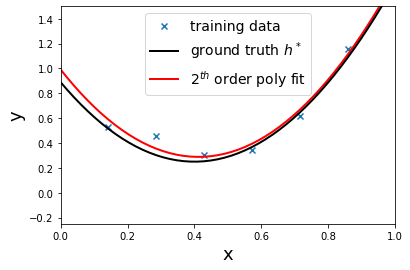

In [63]:
plt.scatter(X_tr,y_tr,marker='x',label='training data')

plt.plot(xx,poly2(xx,*curve_fit(poly2,X_tr,y_tr)[0]),
         'r',lw=2,label='$2^{th}$ order poly fit')
plt.plot(xx,yy,'k',lw=2,label='ground truth $h^*$')

plt.xlim(xx[[0,-1]])
plt.ylim(-.25,1.5)

plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)


handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1],labels[::-1],fontsize=14)#,frameon=False)
plt.savefig('figures/fig09a.pdf')

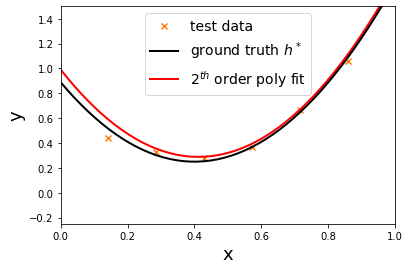

In [64]:
plt.scatter(X_tr,y_te,marker='x',color='C1',label='test data')

plt.plot(xx,poly2(xx,*curve_fit(poly2,X_tr,y_tr)[0]),
         'r',lw=2,label='$2^{th}$ order poly fit')
plt.plot(xx,yy,'k',lw=2,label='ground truth $h^*$')

plt.xlim(xx[[0,-1]])
plt.ylim(-.25,1.5)

plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)


handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1],labels[::-1],fontsize=14)#,frameon=False)
plt.savefig('figures/fig09b.pdf')